In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px 
import plotly.figure_factory as ff
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


/kaggle/input/red-wine-dataset/wineQualityInfo.txt
/kaggle/input/red-wine-dataset/wineQualityReds.csv


In [2]:
df = pd.read_csv("../input/red-wine-dataset/wineQualityReds.csv", index_col=0)

In [3]:
df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
df.isna().sum()

fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

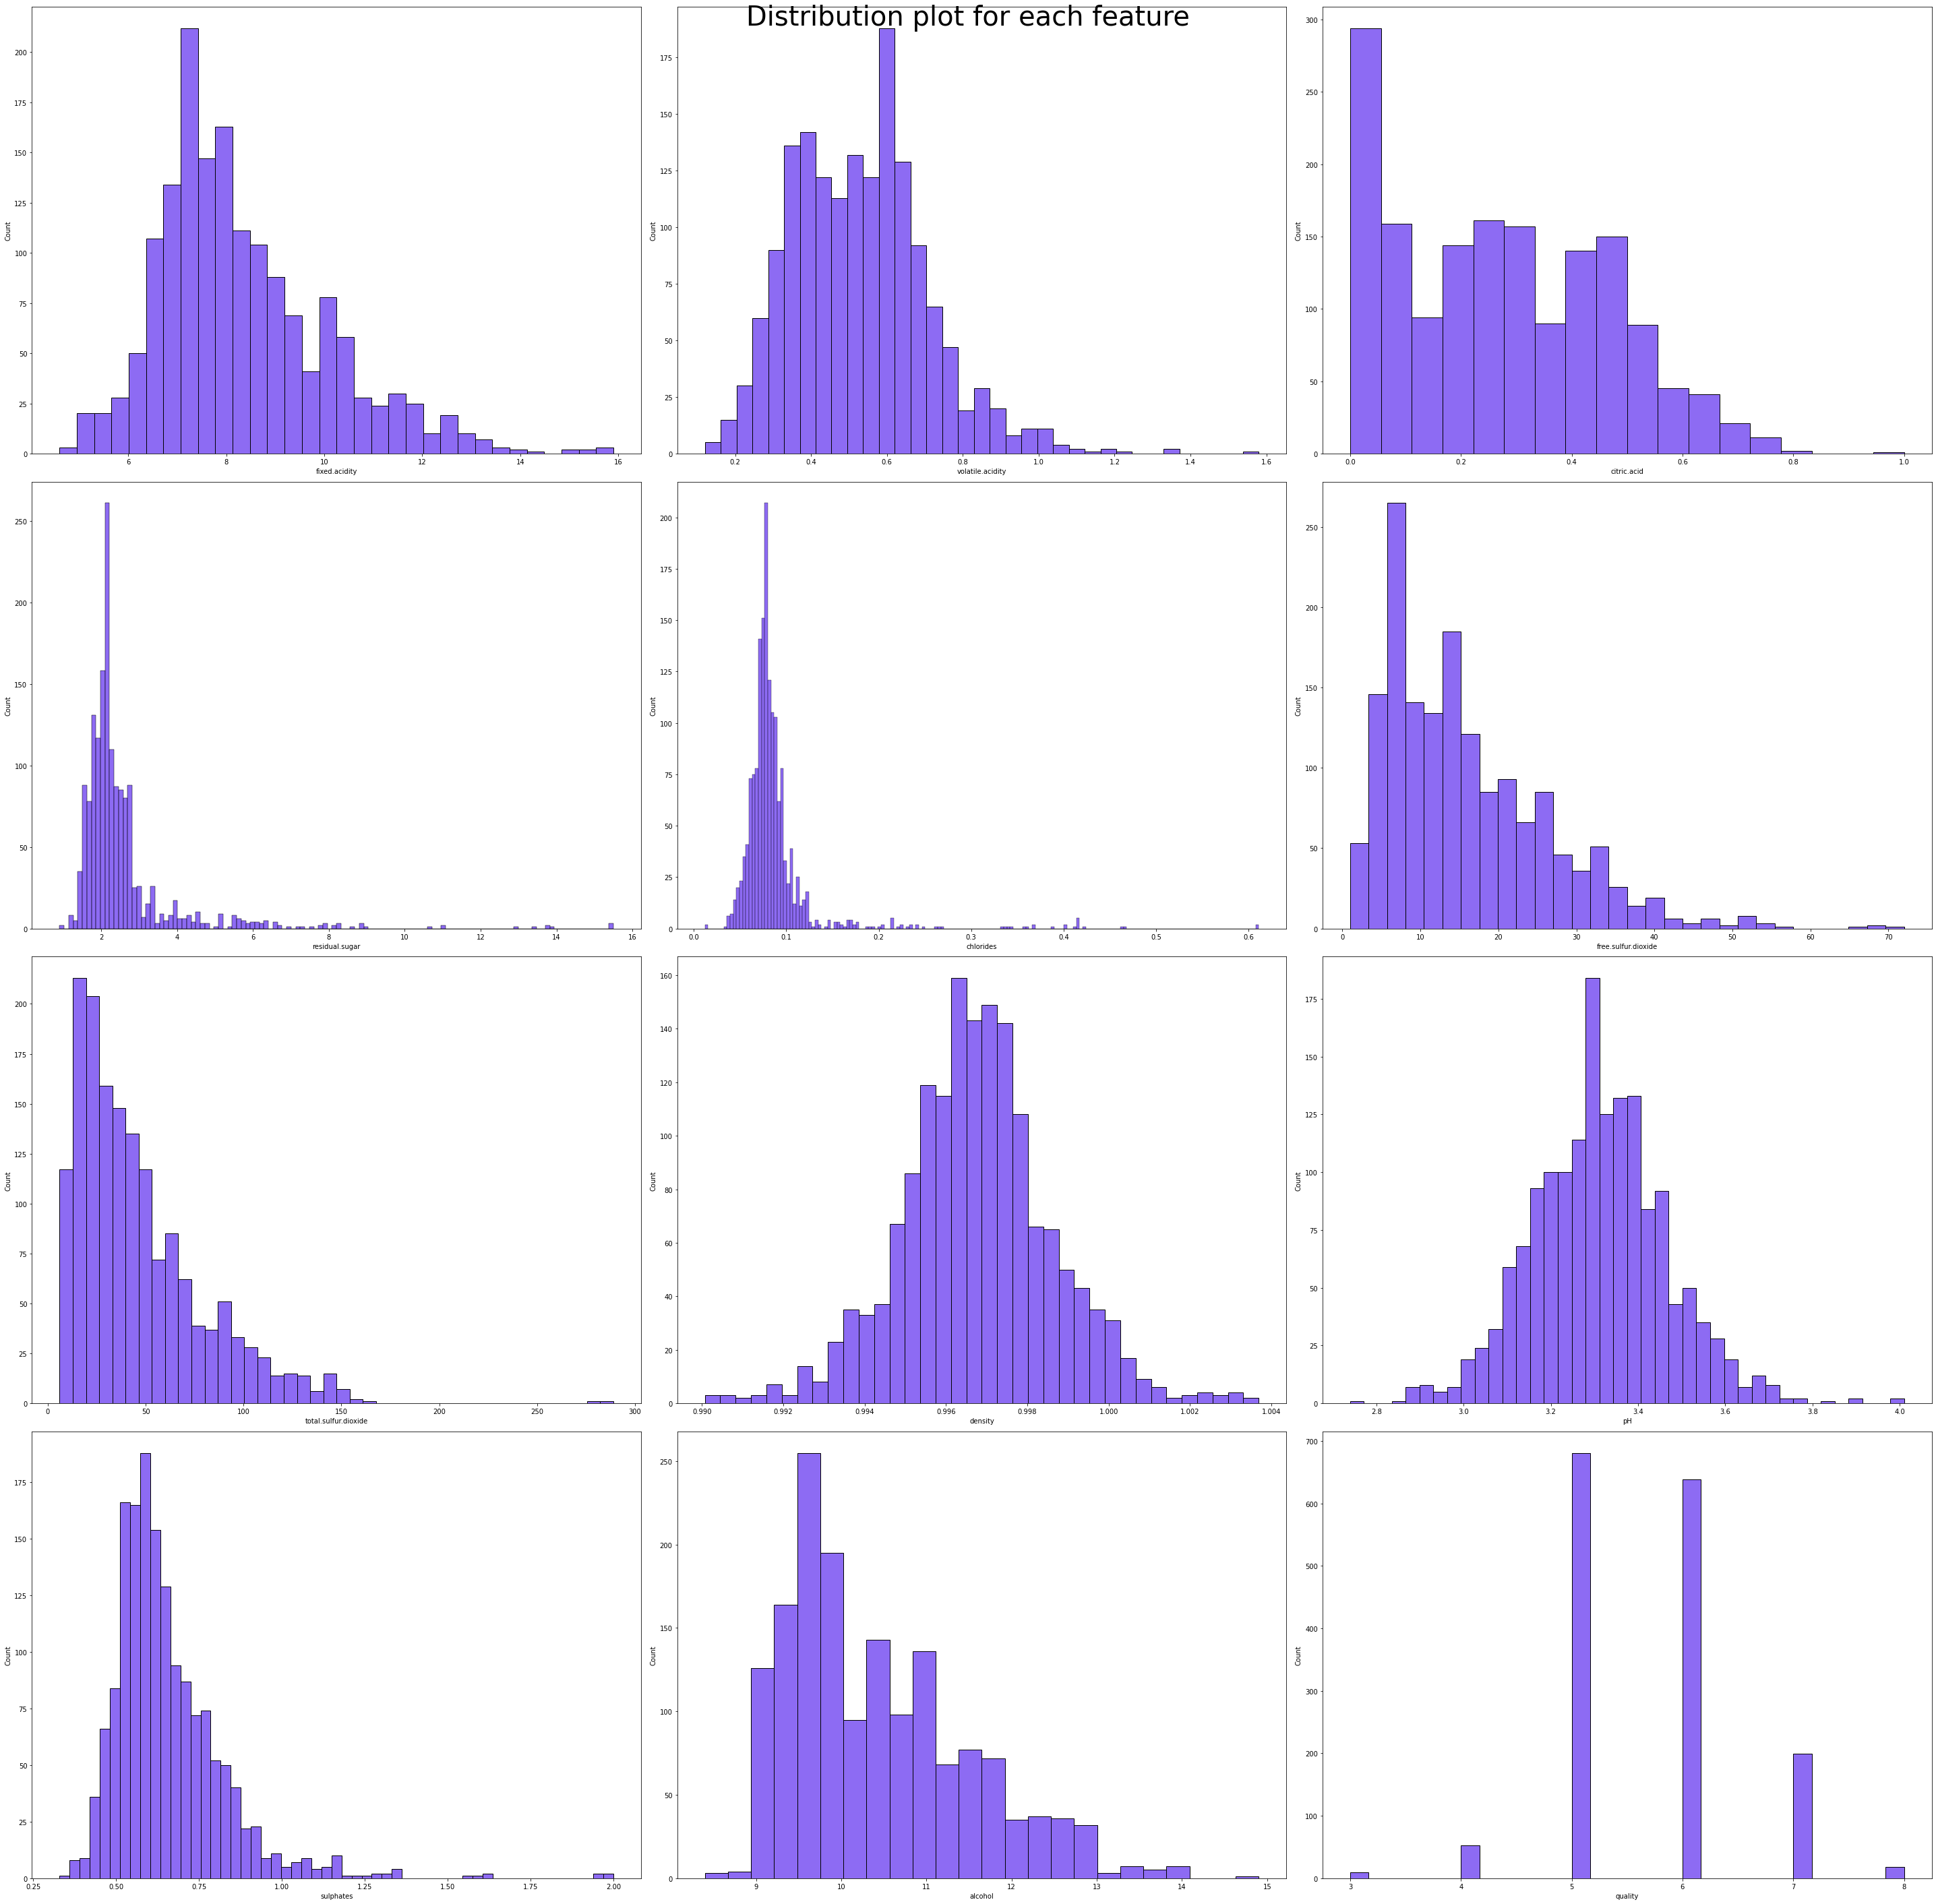

In [6]:
fig, axes = plt.subplots(4,3, figsize=(40,40))
axes = axes.ravel()
k = 0
for i in df.columns  :
    sns.histplot(data=df, x=i, ax=axes[k], color="#673af0")
    k += 1 
fig.suptitle("Distribution plot for each feature", fontsize=40)
fig.tight_layout();

In [7]:
y = df['quality']
x1 = df[['pH','alcohol']]


In [8]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()

In [9]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     268.9
Date:                Wed, 29 Jun 2022   Prob (F-statistic):          2.29e-101
Time:                        07:35:36   Log-Likelihood:                -1694.5
No. Observations:                1599   AIC:                             3395.
Df Residuals:                    1596   BIC:                             3411.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4258      0.387     11.424      0.000       3.666       5.186
pH            -0.8501      0.116     -7.347      0.000      -1.077      -0.623
alcohol        0.3862      0.017     23.036      0.000       0.353       0.419
==============================================================================
Omnibus:                       29.047   Durbin-Watson:                   1.752
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.742
Skew:                          -0.151   Prob(JB):                     7.08e-11
Kurtosis:                       3.781   Cond. No.                         253.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
df.corr()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
fixed.acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile.acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric.acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual.sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free.sulfur.dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total.sulfur.dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [11]:
y = df['quality']
x1 = df[['sulphates','alcohol','density','total.sulfur.dioxide','citric.acid','volatile.acidity']]


In [12]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()

In [13]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     139.2
Date:                Wed, 29 Jun 2022   Prob (F-statistic):          5.81e-142
Time:                        07:35:36   Log-Likelihood:                -1589.4
No. Observations:                1599   AIC:                             3193.
Df Residuals:                    1592   BIC:                             3230.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -7.0093     11.972     -0.585      0.558     -30.493      16.474
sulphates                0.7100      0.104      6.856      0.000       0.507       0.913
alcohol                  0.3046      0.020     15.555      0.000       0.266       0.343
density                  9.8195     11.931      0.823      0.411     -13.582      33.221
total.sulfur.dioxide    -0.0022      0.001     -4.217      0.000      -0.003      -0.001
citric.acid             -0.0928      0.120     -0.772      0.440      -0.328       0.143
volatile.acidity        -1.2469      0.116    -10.714      0.000      -1.475      -1.019
==============================================================================
Omnibus:                       28.617   Durbin-Watson:                   1.752
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.164
Skew:                          -0.156   Prob(JB):                     1.56e-10
Kurtosis:                       3.762   Cond. No.                     5.94e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
y = df['quality']
x1 = df[['sulphates','alcohol','total.sulfur.dioxide','volatile.acidity']]

In [15]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()

In [16]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     208.8
Date:                Wed, 29 Jun 2022   Prob (F-statistic):          4.23e-144
Time:                        07:35:36   Log-Likelihood:                -1589.8
No. Observations:                1599   AIC:                             3190.
Df Residuals:                    1594   BIC:                             3217.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.8258      0.201     14.081      0.000       2.432       3.219
sulphates                0.7121      0.101      7.085      0.000       0.515       0.909
alcohol                  0.2953      0.016     18.419      0.000       0.264       0.327
total.sulfur.dioxide    -0.0022      0.001     -4.376      0.000      -0.003      -0.001
volatile.acidity        -1.1986      0.097    -12.407      0.000      -1.388      -1.009
==============================================================================
Omnibus:                       28.390   Durbin-Watson:                   1.750
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.340
Skew:                          -0.159   Prob(JB):                     2.35e-10
Kurtosis:                       3.751   Cond. No.                         741.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""